In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

First Visualisation: Trend in Japan tourism, USJ, Tokyo Disneyland

In [102]:
td = pd.read_csv("Disney_Japan_Attendance.csv")
usj = pd.read_csv("Universal_Studios_Japan_Attendance.csv")
tourism = pd.read_csv("japan_annual_tourism.csv")

In [ ]:
def label_years(ax, df):
    # Define important years and their corresponding attractions
    important_years = {
        2014: "The Wizarding World of Harry Potter",
        2017: "Minion Park",
        2021: "Super Mario"
    }

    # Annotate the plot for each important year
    for year, attraction in important_years.items():
        ax.annotate(attraction, 
                    xy=(year, df.loc[df['Year'] == year, 'Attendance'].values[0]),
                    xytext=(year, df.loc[df['Year'] == year, 'Attendance'].values[0] + 500000),
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    fontsize=9,
                    ha='center')

In [143]:
def filter_df(*dfs, min_year=2009, max_year=2023):
    years_range = range(min_year, max_year+1) 
    res = ()
    for df in dfs:
        df = df[df['Year'].isin(years_range)]
        df.reset_index(drop=True, inplace=True)
        res += (df,)
    return res

In [144]:
def viz_1(tokyo_disney, usj, japan_tourism):
    usj, tokyo_disney_filtered, japan_tourism_filtered = filter_df(usj, tokyo_disney, japan_tourism)
    
    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot Japan Tourism
    plt.plot(japan_tourism_filtered['Year'], japan_tourism_filtered['num_visitors'], label='Japan Tourism', marker='o')

    # Plot USJ
    plt.plot(usj['Year'], usj['Attendance'], label='USJ Attendance', marker='o')

    # Plot Tokyo Disneyland
    plt.plot(tokyo_disney_filtered['Year'], tokyo_disney_filtered['Attendance'], label='Tokyo Disneyland Attendance', marker='o')

    # Adding title and labels
    plt.title('Trend in Japan Tourism (2009-2023)')
    plt.xlabel('Year')
    plt.ylabel('Number of Visitors')
    plt.legend()
    plt.grid()
    plt.tight_layout()

    label_years(plt.gca())  # Pass the current axes

    # Show plot
    plt.show()

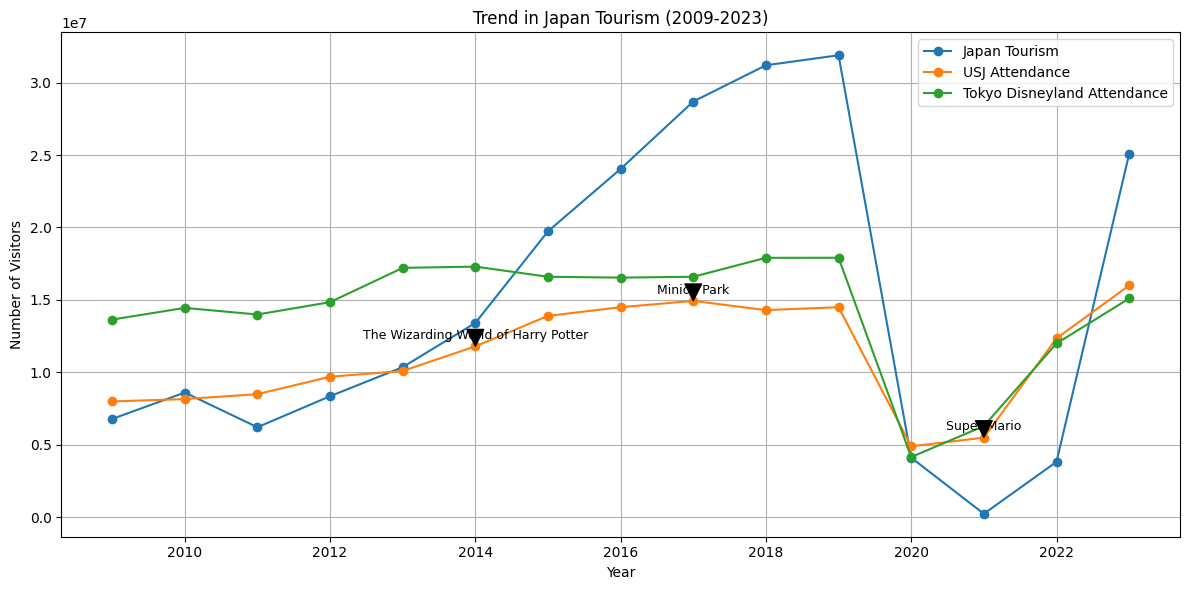

In [145]:
viz_1(td, usj, tourism)

In [155]:
import numpy as np
def plot_YoY_change_bar(df, axes, i):
    # Determine the colors based on the percentage change
    colors = np.where(df['YoY_Change'] >= 0, 'skyblue', 'red')  # Blue for positive, red for negative
    
    # Plot the bar chart for YoY percentage change with specified colors
    bars = axes[i].bar(df['Year'], df['YoY_Change'], color=colors)

    # Set title and labels
    axes[i].set_title(f'{df["Year"].iloc[0]} to {df["Year"].iloc[-1]} YoY Percentage Change')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Percentage Change (%)')
    axes[i].axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line
    axes[i].grid(axis='y')  # Optional: Add grid lines for better readability

    # Label each bar with its percentage change
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')


In [156]:
def viz_2_bar(tokyo_disney, usj, japan_tourism):
    dfs = filter_df(usj, tokyo_disney, japan_tourism)
    usj, tokyo_disney_filtered, japan_tourism_filtered = dfs
    
    # Calculate YoY percentage change for USJ
    usj['YoY_Change'] = usj['Attendance'].pct_change() * 100

    # Calculate YoY percentage change for Tokyo Disneyland
    tokyo_disney_filtered['YoY_Change'] = tokyo_disney_filtered['Attendance'].pct_change() * 100

    print(tokyo_disney_filtered)

    # Create a comparison DataFrame
    comparison_df = pd.DataFrame({
        'Year': usj['Year'],
        'USJ YoY Change (%)': usj['YoY_Change'],
        'Tokyo Disneyland YoY Change (%)': tokyo_disney_filtered['YoY_Change']
    })

    # Print the comparison table
    print(comparison_df)

    # Set up the bar charts
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

    for i in range(len(dfs)):
        plot_YoY_change_bar(dfs[i], axes, i)

    # Adjust layout
    plt.tight_layout()
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_42788\2384764020.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokyo_disney_filtered['YoY_Change'] = tokyo_disney_filtered['Attendance'].pct_change() * 100


    Year  Attendance  YoY_Change
0   2009    13646000         NaN
1   2010    14452000    5.906493
2   2011    13996000   -3.155273
3   2012    14847000    6.080309
4   2013    17214000   15.942615
5   2014    17300000    0.499593
6   2015    16600000   -4.046243
7   2016    16540000   -0.361446
8   2017    16600000    0.362757
9   2018    17907000    7.873494
10  2019    17910000    0.016753
11  2020     4160000  -76.772753
12  2021     6300000   51.442308
13  2022    12000000   90.476190
14  2023    15100000   25.833333
    Year  USJ YoY Change (%)  Tokyo Disneyland YoY Change (%)
0   2009                 NaN                              NaN
1   2010            2.000000                         5.906493
2   2011            4.166667                        -3.155273
3   2012           14.117647                         6.080309
4   2013            4.123711                        15.942615
5   2014           16.831683                         0.499593
6   2015           17.796610          

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


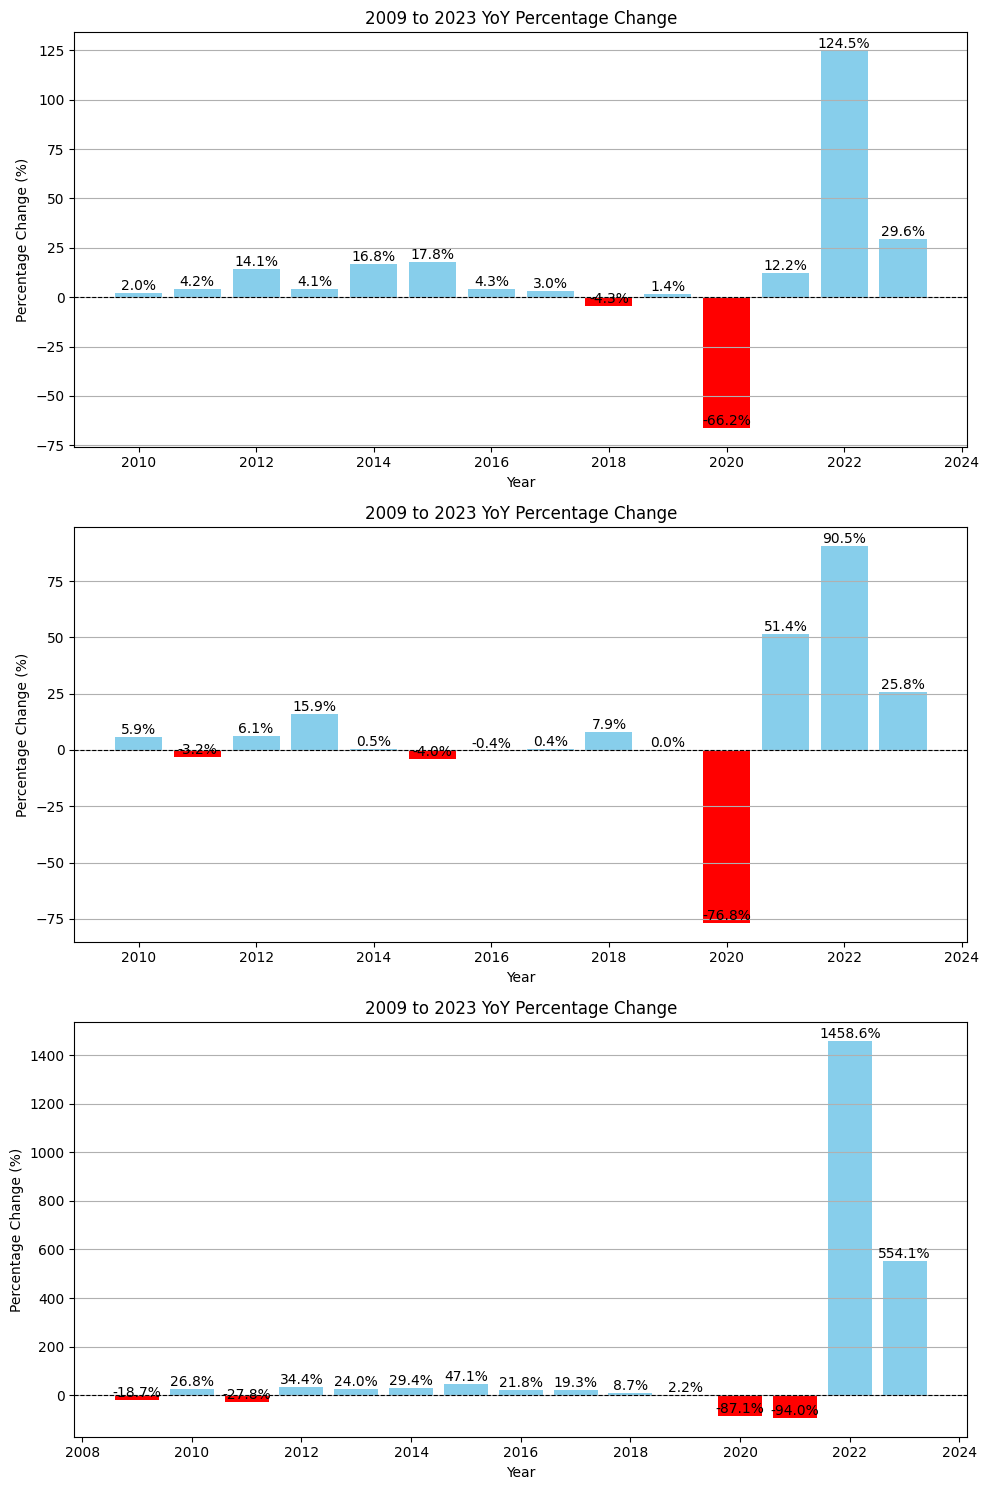

In [157]:
viz_2_bar(td, usj, tourism)

In [ ]:
def viz_2_line(tokyo_disney, usj, japan_tourism):
    usj, tokyo_disney_filtered, japan_tourism_filtered = filter_df(usj, tokyo_disney, japan_tourism)+

    # Calculate YoY percentage change for USJ
    usj['YoY_change'] = usj['Attendance'].pct_change() * 100

    # Calculate YoY percentage change for Tokyo Disneyland
    tokyo_disney_filtered['YoY_change'] = tokyo_disney_filtered['Attendance'].pct_change() * 100

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot Japan Tourism YoY Change
    plt.plot(japan_tourism_filtered['year'], japan_tourism_filtered['%_change'], label='Japan Tourism YoY Change', marker='o')

    # Plot USJ YoY Change
    plt.plot(usj['Year'], usj['YoY_change'], label='USJ YoY Change', marker='o')

    # Plot Tokyo Disneyland YoY Change
    plt.plot(tokyo_disney_filtered['Year'], tokyo_disney_filtered['YoY_change'], label='Tokyo Disneyland YoY Change', marker='o')

    # Adding title and labels
    plt.title('Year-over-Year Percentage Change in Japan Tourism (2009-2023)')
    plt.xlabel('Year')
    plt.ylabel('YoY Percentage Change (%)')
    plt.xticks(years_range)  # Set x-ticks to be the years
    plt.legend()
    plt.grid()
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0 for reference
    plt.tight_layout()

    # Show plot
    plt.show()
        

C:\Users\user\AppData\Local\Temp\ipykernel_42788\2758493172.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokyo_disney_filtered['YoY_change'] = tokyo_disney_filtered['Attendance'].pct_change() * 100


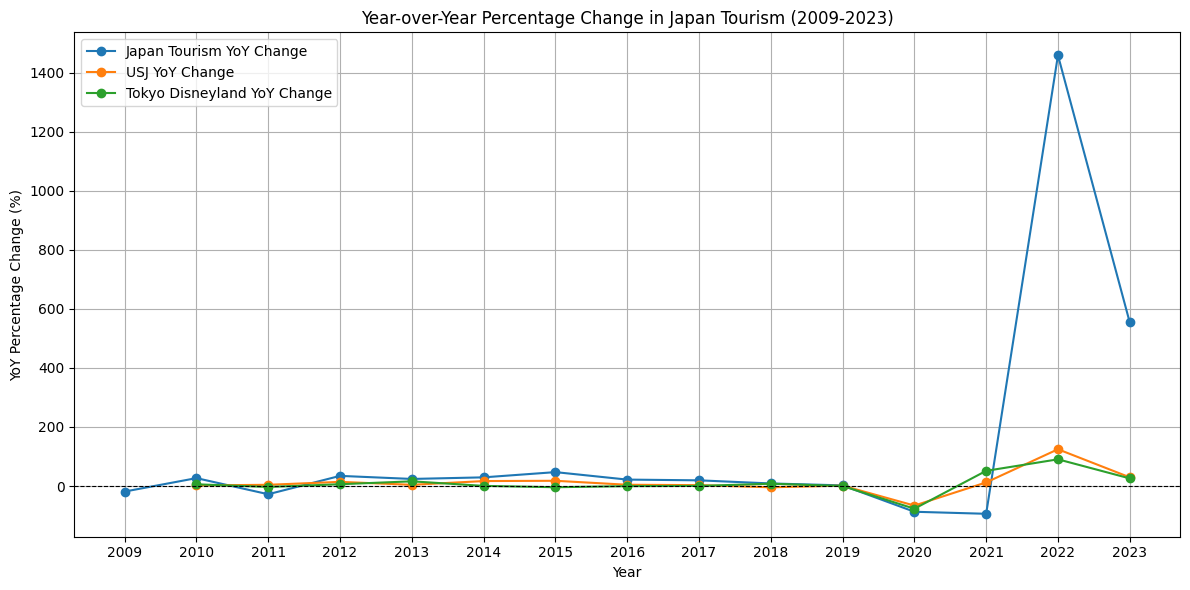

In [ ]:
viz_2_line(td, usj, tourism)5

C:\Users\user\AppData\Local\Temp\ipykernel_42788\3168196920.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokyo_disney_filtered['YoY_change'] = tokyo_disney_filtered['Attendance'].pct_change() * 100


    Year  Attendance  YoY_change
3   2009    13646000         NaN
4   2010    14452000    5.906493
5   2011    13996000   -3.155273
6   2012    14847000    6.080309
7   2013    17214000   15.942615
8   2014    17300000    0.499593
9   2015    16600000   -4.046243
10  2016    16540000   -0.361446
11  2017    16600000    0.362757
12  2018    17907000    7.873494
13  2019    17910000    0.016753
14  2020     4160000  -76.772753
15  2021     6300000   51.442308
16  2022    12000000   90.476190
17  2023    15100000   25.833333
      Year  USJ YoY Change (%)  Tokyo Disneyland YoY Change (%)
0   2009.0                 NaN                              NaN
1   2010.0            2.000000                              NaN
2   2011.0            4.166667                              NaN
3   2012.0           14.117647                              NaN
4   2013.0            4.123711                         5.906493
5   2014.0           16.831683                        -3.155273
6   2015.0           17.

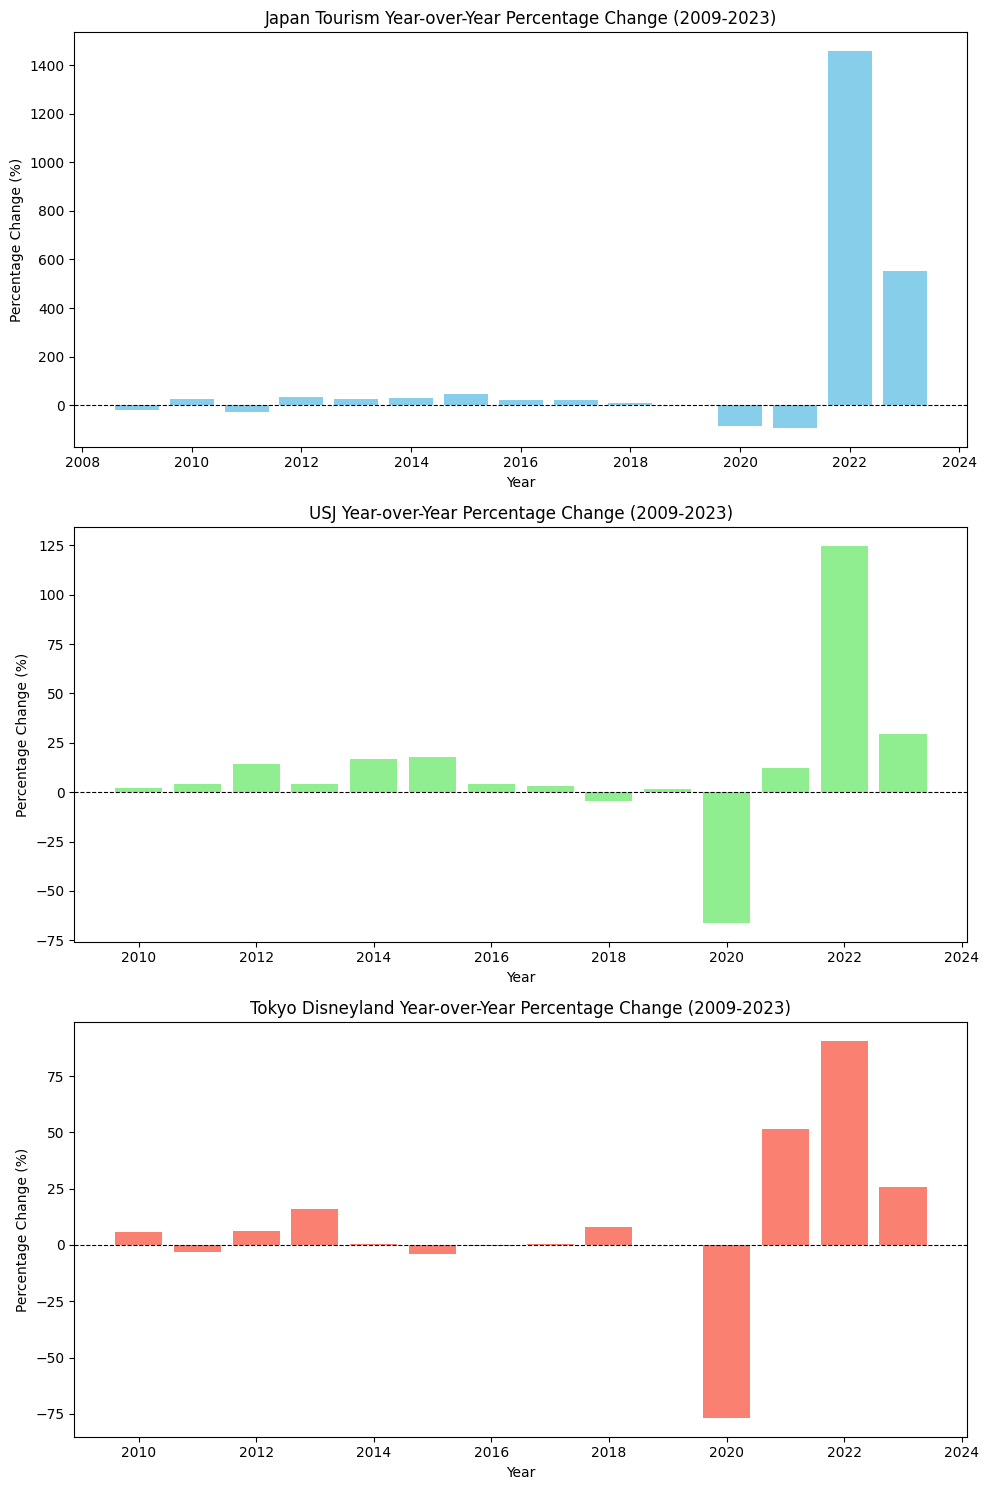

In [91]:
viz_2_bar(td, usj, tourism)